In [1]:
install_ntl = True
if install_ntl:
    print("pull personal_gkyl_scripts repository")
    %pip install --upgrade pip
    !git -C ~/programming/ninetails/ pull
    !sh ~/programming/ninetails/install.sh >  install.log

import numpy as np
import os, sys
import ninetails as ntl

pull personal_gkyl_scripts repository
Note: you may need to restart the kernel to use updated packages.
Already up to date.


/Users/ahoffmann/.pyenv/versions/3.12.2/lib/python3.12/site-packages/ninetails/fastfouriertransform.py:8: UserWarning: CuPy not found. GPU FFTs will not be available.
  warnings.warn("CuPy not found. GPU FFTs will not be available.")


In [ ]:
simulation = ntl.Simulation()
tau = 0.01
kT = 0.36
kN = 0.0
chi = 0.1
cf = 4.0
simulation.set_physicalconfig(
    tau = tau,
    nu = 3.0*chi/(cf*2.0*tau),
    RN  = kN,
    RT = 2*kT/tau,
)
simulation.set_numericalconfig(
    max_time=10.0, 
    dt=0.01,
    nz=1,
    Lx= 100,
    Ly= 150,
    nx = 64,
    ny = 64,
    muHD = 0.0*tau
)
simulation.set_simulationconfig(
    nonlinear=False, 
    model_type='GM4',
    geometry='zpinch'
    )
simulation.run()


Integrating using RK4 method...
Integration completed in 2.20 seconds.


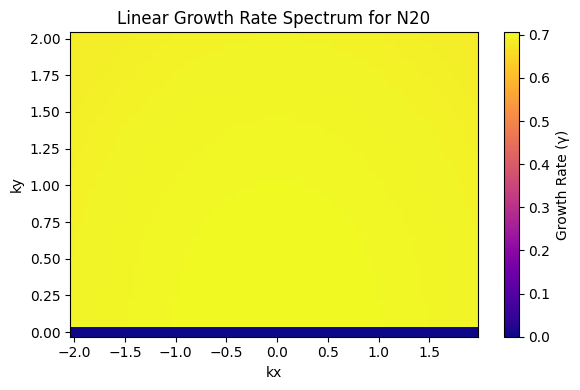

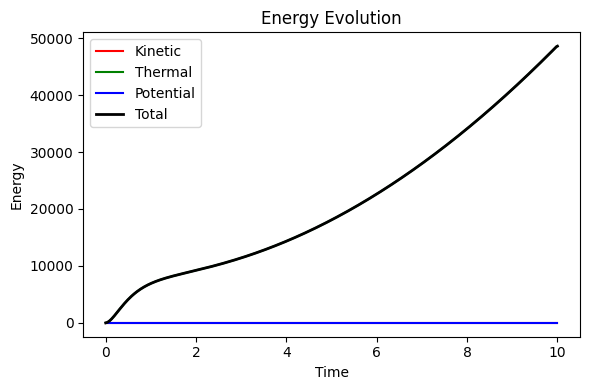

In [11]:
#simulation.plotter.snapshot('N20',-1)
simulation.plotter.growth_rates(moment_name='N20')
simulation.plotter.energy_evolution()
#simulation.plotter.create_gif('N',moviename='GM4_N.gif')

Integrating using RK4 method...
Integration completed in 3.18 seconds.


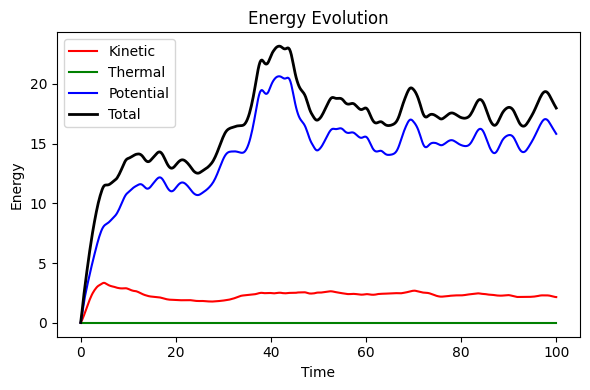

In [4]:
simulation = ntl.Simulation()
simulation.set_numericalconfig(max_time=100.0)
simulation.set_simulationconfig(nonlinear=True, model_type='MHW')
simulation.run()
#simulation.plotter.growth_rates()
simulation.plotter.energy_evolution()
# simulation.plotter.create_gif('N',moviename='MHW_N.gif')

In [5]:
simulation = ntl.Simulation()
simulation.set_numericalconfig(max_time=50.0)
simulation.set_simulationconfig(nonlinear=False, model_type='HW')
simulation.run()
# #simulation.plotter.growth_rates()
# simulation.plotter.energy_evolution()
# simulation.plotter.create_gif('N',moviename='HW_N.gif')

Integrating using RK4 method...
Integration completed in 0.31 seconds.


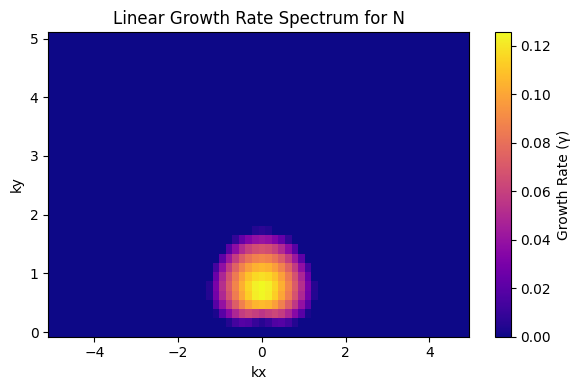

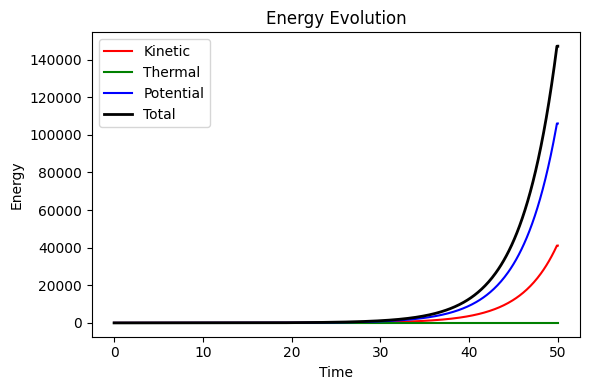

In [6]:
simulation.plotter.growth_rates(moment_name='N')
simulation.plotter.energy_evolution()

In [7]:
simulation = ntl.Simulation()
simulation.set_simulationconfig(model_type="HM")
simulation.set_physicalconfig(kappa=1.0, alpha=0.0)
simulation.set_numericalconfig(max_time=100.0,muHD=0.001, dt = 0.05)
simulation.set_simulationconfig(nonlinear=True)
# simulation.run()
# simulation.plotter.energy_evolution()
# simulation.plotter.create_gif('N',moviename='HM_N.gif')